In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import *

In [2]:
df_journey = pd.read_csv("data/df_journey.csv")

In [3]:
dico_mode={10:"Metro",11:"Metro",14:"Metro",17:"Metro",18:"Metro",19:"Metro",4:"Bus",176:"Bus",177:"Bus",30:"Tram"}

In [4]:
df_journey["Mode"] = df_journey["Line"].replace(dico_mode)

In [5]:
df_journey["Day"] = df_journey["ExpectedArrivalTime"].apply(lambda x: datetime.strptime(x[:10],"%Y-%m-%d"))
df_journey["Departure_Hour"] = df_journey["ExpectedDepartureTime"].apply(lambda x: datetime.strptime(x[11:],"%H:%M:%S"))

In [78]:
days = df_journey["Day"].value_counts().sort_index().index
day_0 = days[0]
day_last = days[-1]
days = [day_0+timedelta(i) for i in range((day_last-day_0).days+1)]

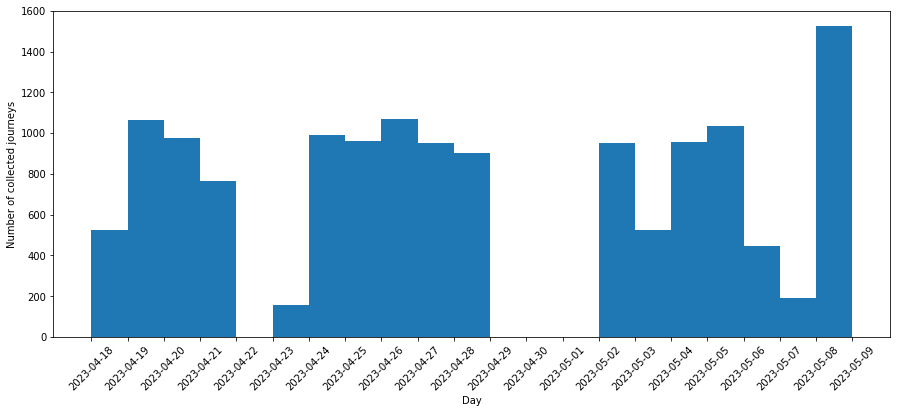

In [87]:
plt.figure(figsize=[15,6])
plt.hist(df_journey["Day"],days)
plt.xticks(days,rotation=45)
plt.xlabel("Day")
plt.ylabel("Number of collected journeys")
plt.show()

In [105]:
midday = datetime(1900,1,1,12)
start_morning = datetime(1900,1,1,6,50)
start_afternoon= datetime(1900,1,1,15,50)

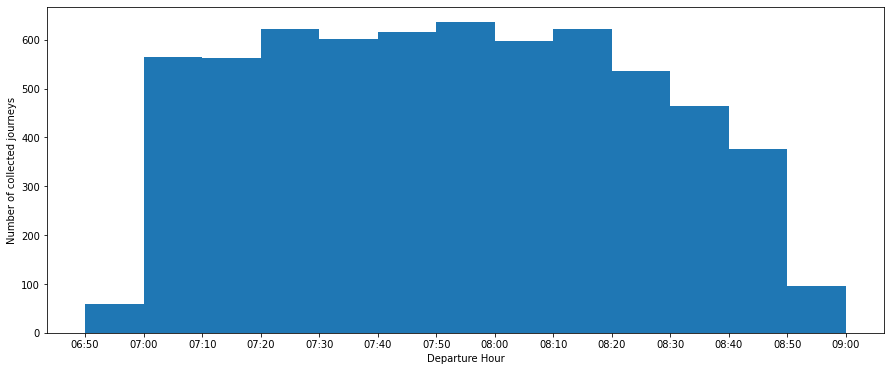

In [144]:
ticks = [start_morning+timedelta(minutes=10*i) for i in range(14)]
plt.figure(figsize=[15,6])
plt.hist(df_journey[df_journey["Departure_Hour"]<midday]["Departure_Hour"],ticks)
plt.xticks(ticks,[tick.strftime("%H:%M") for tick in ticks],rotation=0)
plt.xlabel("Departure Hour")
plt.ylabel("Number of collected journeys")
plt.show()

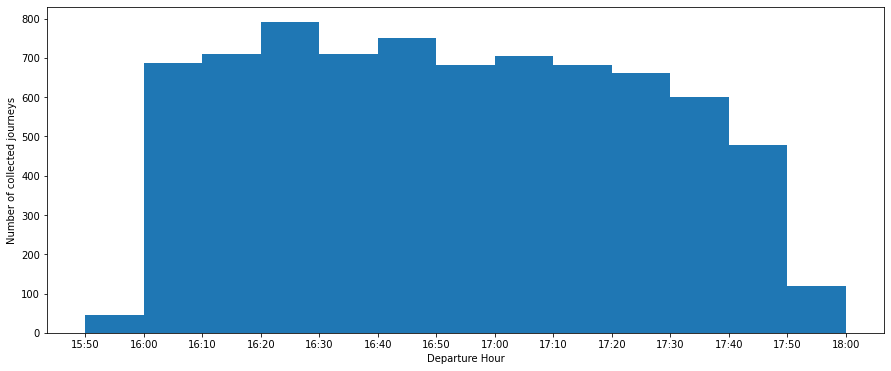

In [145]:
ticks = [start_afternoon+timedelta(minutes=10*i) for i in range(14)]
plt.figure(figsize=[15,6])
plt.hist(df_journey[df_journey["Departure_Hour"]>midday]["Departure_Hour"],ticks)
plt.xticks(ticks,[tick.strftime("%H:%M") for tick in ticks],rotation=0)
plt.xlabel("Departure Hour")
plt.ylabel("Number of collected journeys")
plt.show()

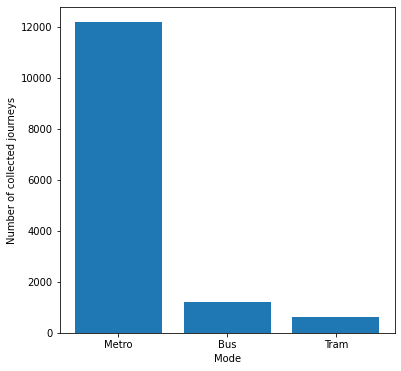

In [143]:
plt.figure(figsize=[6,6])
plt.hist(df_journey["Mode"],["Metro","Bus","Tram",""],align='left',rwidth=0.8)
plt.xticks(["Metro","Bus","Tram"],["Metro","Bus","Tram"])
plt.xlabel("Mode")
plt.ylabel("Number of collected journeys")
plt.show()

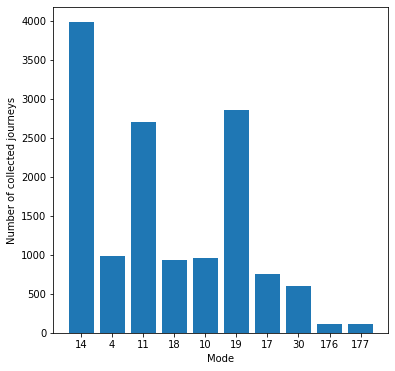

In [14]:
plt.figure(figsize=[6,6])
plt.hist(df_journey["Line"].astype(str),np.concatenate([(df_journey["Line"].unique()).astype(str),[""]]),align='left',rwidth=0.8)
plt.xticks((df_journey["Line"].unique()).astype(str),(df_journey["Line"].unique()).astype(str))
plt.xlabel("Line")
plt.ylabel("Number of collected journeys")
plt.show()

array([  4,  10,  11,  14,  17,  18,  19,  30, 176, 177], dtype=int64)